In [1]:
from functions_goodreads import *
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin
import pandas as pd
import numpy as np

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://www.goodreads.com/author/show/20013214.Jack_Edwards"
url2 = "https://www.goodreads.com/user/show/9850676-landice-manic-femme"
urls = []

In [3]:
url_base = get_url_base(url)
print(url_base)

https://goodreads.com/review/list/91520258


In [4]:
read = get_read_url(url_base)
currently_reading = get_currently_reading_url(url_base)
want_to_read = get_want_to_read_url(url_base)
print(read, currently_reading, want_to_read)

https://goodreads.com/review/list/91520258?shelf=read https://goodreads.com/review/list/91520258?shelf=currently-reading https://goodreads.com/review/list/91520258?shelf=to-read


In [5]:
columns = get_database_columns(read)
print(columns)

['checkbox', 'position', 'cover', 'title', 'author', 'isbn', 'avg_rating', 'num_ratings', 'date_pub', 'rating', 'shelves', 'review', 'notes', 'comments', 'votes', 'date_read', 'date_added', 'date_purchased', 'purchase_location', 'owned', 'condition', 'actions', 'recommender', 'date_started', 'read_count', 'isbn13', 'num_pages', 'date_pub_edition', 'asin', 'format']


In [6]:
genres = get_genres('https://www.goodreads.com/book/show/43398196-tokyo-ueno-station')
print(genres)

['Fiction', 'Japan', 'Japanese Literature', 'Contemporary', 'Historical Fiction', 'Literary Fiction', 'Magical Realism']


In [7]:
num_of_pages = get_num_of_pages(read)
print(num_of_pages)

18


In [8]:
books = get_books_from_page(read)
books_df = pd.DataFrame(books)
display(books_df)

,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,actions,book_url
0,https://i.gr-assets.com/images/S/compressed.ph...,The Crane Wife: A Memoir in Essays,"Hauser, C.J.",4.11,3,1198,320,11/09/2022,11/09/2022,1,Hardcover,None,https://goodreads.com/book/show/57925999-the-c...
1,https://i.gr-assets.com/images/S/compressed.ph...,Our Missing Hearts,"Ng, Celeste",3.96,3,15148,335,11/07/2022,11/09/2022,1,Hardcover,None,https://goodreads.com/book/show/60149573-our-m...
2,https://i.gr-assets.com/images/S/compressed.ph...,Tokyo Ueno Station,"Yū, Miri",3.54,2,13927,197,10/19/2022,10/21/2022,1,Paperback,None,https://goodreads.com/book/show/43398196-tokyo...
3,https://i.gr-assets.com/images/S/compressed.ph...,Breasts and Eggs,"Kawakami, Mieko",3.86,3,27730,430,10/19/2022,10/25/2022,1,Hardcover,None,https://goodreads.com/book/show/50736031-breas...
4,https://i.gr-assets.com/images/S/compressed.ph...,Grief is the Thing with Feathers,"Porter, Max",3.85,3,34172,114,10/17/2022,10/18/2022,1,Hardcover,None,https://goodreads.com/book/show/25334576-grief...
5,https://i.gr-assets.com/images/S/compressed.ph...,The Architecture of Happiness,"de Botton, Alain",3.86,2,11927,280,10/15/2022,10/15/2022,1,Hardcover,None,https://goodreads.com/book/show/23418.The_Arch...
6,https://i.gr-assets.com/images/S/compressed.ph...,Fleabag: The Scriptures,"Waller-Bridge, Phoebe",4.87,5,5847,368,10/15/2022,10/16/2022,1,Hardcover,None,https://goodreads.com/book/show/51042792-fleabag
7,https://i.gr-assets.com/images/S/compressed.ph...,Nightcrawling,"Mottley, Leila",4.11,5,14290,288,10/12/2022,10/25/2022,1,Hardcover,None,https://goodreads.com/book/show/58537371-night...
8,https://i.gr-assets.com/images/S/compressed.ph...,Man's Search for Meaning,"Frankl, Viktor E.",4.37,3,579056,165,10/06/2022,10/08/2022,1,Paperback,None,https://goodreads.com/book/show/4069.Man_s_Sea...
9,https://i.gr-assets.com/images/S/compressed.ph...,Glory,"Bulawayo, NoViolet",3.78,2,1669,416,10/06/2022,10/13/2022,1,Hardcover,None,https://goodreads.com/book/show/58491879-glory


In [9]:
all_books = get_books_from_shelf(read)

all_books_df = pd.DataFrame(all_books)
all_books_df.rename(columns = {'actions':'review'}, inplace = True)
display(all_books_df)
# add link to book as column or just use it to get to genres

,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,review,book_url
0,https://i.gr-assets.com/images/S/compressed.ph...,The Crane Wife: A Memoir in Essays,"Hauser, C.J.",4.11,3,1198,320,11/09/2022,11/09/2022,1,Hardcover,None,https://goodreads.com/book/show/57925999-the-c...
1,https://i.gr-assets.com/images/S/compressed.ph...,Our Missing Hearts,"Ng, Celeste",3.96,3,15148,335,11/07/2022,11/09/2022,1,Hardcover,None,https://goodreads.com/book/show/60149573-our-m...
2,https://i.gr-assets.com/images/S/compressed.ph...,Tokyo Ueno Station,"Yū, Miri",3.54,2,13927,197,10/19/2022,10/21/2022,1,Paperback,None,https://goodreads.com/book/show/43398196-tokyo...
3,https://i.gr-assets.com/images/S/compressed.ph...,Breasts and Eggs,"Kawakami, Mieko",3.86,3,27730,430,10/19/2022,10/25/2022,1,Hardcover,None,https://goodreads.com/book/show/50736031-breas...
4,https://i.gr-assets.com/images/S/compressed.ph...,Grief is the Thing with Feathers,"Porter, Max",3.85,3,34172,114,10/17/2022,10/18/2022,1,Hardcover,None,https://goodreads.com/book/show/25334576-grief...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,https://i.gr-assets.com/images/S/compressed.ph...,Venus and Adonis,"Shakespeare, William",3.65,5,2727,16,1/26/2019,1/26/2019,1,None,None,https://goodreads.com/book/show/361015.Venus_a...
535,https://i.gr-assets.com/images/S/compressed.ph...,Villette,"Brontë, Charlotte",3.77,2,67506,573,4/20/2019,5/20/2019,1,Paperback,None,https://goodreads.com/book/show/31173.Villette
536,https://i.gr-assets.com/images/S/compressed.ph...,North and South,"Gaskell, Elizabeth",4.14,3,158923,521,1/12/2019,2/19/2019,1,Paperback,None,https://goodreads.com/book/show/156538.North_a...
537,https://i.gr-assets.com/images/S/compressed.ph...,We Should All Be Feminists,"Adichie, Chimamanda Ngozi",4.42,4,252646,65,1/11/2019,1/11/2019,1,Kindle Edition,https://goodreads.com/review/show/2670928662,https://goodreads.com/book/show/22738563-we-sh...


In [9]:
all_books_df.isna().any()

cover           False
title           False
author          False
avg_rating      False
rating           True
num_ratings      True
num_pages        True
date_started     True
date_read        True
read_count      False
format           True
review           True
book_url        False
dtype: bool

In [10]:
all_books_df.dtypes

cover           object
title           object
author          object
avg_rating      object
rating          object
num_ratings     object
num_pages       object
date_started    object
date_read       object
read_count      object
format          object
review          object
book_url        object
dtype: object

In [11]:
numeric_cols = ['avg_rating', 'rating', 'num_ratings', 'num_pages', 'read_count']
all_books_df[numeric_cols] = all_books_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

date_cols = ['date_started', 'date_read']
all_books_df[date_cols] = all_books_df[date_cols].apply(pd.to_datetime, infer_datetime_format=True)

In [12]:
all_books_df.dtypes

cover                   object
title                   object
author                  object
avg_rating             float64
rating                 float64
num_ratings            float64
num_pages              float64
date_started    datetime64[ns]
date_read       datetime64[ns]
read_count             float64
format                  object
review                  object
book_url                object
dtype: object

In [13]:
books_without_ratings = all_books_df[all_books_df['rating'].isna()]
display(books_without_ratings)
books_with_ratings = all_books_df[~all_books_df['rating'].isna()]
display(books_with_ratings)

,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,review,book_url
104,https://i.gr-assets.com/images/S/compressed.ph...,Man Down,"Goodhand, James",4.12,NaN,NaN,391.0,2022-03-27,2022-04-15,1.0,Kindle Edition,None,https://goodreads.com/book/show/58480771-man-down
174,https://i.gr-assets.com/images/S/compressed.ph...,Things Have Gotten Worse Since We Last Spoke,"LaRocca, Eric",3.05,NaN,31526.0,120.0,2021-10-18,2021-10-19,1.0,Paperback,None,https://goodreads.com/book/show/58236753-thing...
438,https://i.gr-assets.com/images/S/compressed.ph...,"The Queer Cultures of 1930s Prose: Language, I...","Charteris, Charlotte",3.00,NaN,NaN,NaN,2019-12-24,2019-12-26,1.0,Hardcover,None,https://goodreads.com/book/show/41772024-the-q...
439,https://i.gr-assets.com/images/S/compressed.ph...,The Cambridge Companion to the Literature of B...,"Webber, Andrew J.",4.00,NaN,NaN,302.0,2019-12-24,2019-12-24,1.0,Paperback,None,https://goodreads.com/book/show/34497958-the-c...
440,https://i.gr-assets.com/images/S/compressed.ph...,"Political Inversions: Homosexuality, Fascism, ...","Hewitt, Andrew",3.33,NaN,NaN,333.0,2019-12-24,2019-12-24,1.0,Hardcover,None,https://goodreads.com/book/show/422353.Politic...
502,https://i.gr-assets.com/images/S/compressed.ph...,The Cambridge Companion to William Carlos Will...,"MacGowan, Christopher",4.25,NaN,NaN,236.0,2019-06-03,2019-06-03,1.0,Paperback,None,https://goodreads.com/book/show/28130991-the-c...


,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,review,book_url
0,https://i.gr-assets.com/images/S/compressed.ph...,Tokyo Ueno Station,"Yū, Miri",3.54,2.0,13896.0,197.0,2022-10-19,2022-10-21,1.0,Paperback,None,https://goodreads.com/book/show/43398196-tokyo...
1,https://i.gr-assets.com/images/S/compressed.ph...,Breasts and Eggs,"Kawakami, Mieko",3.86,3.0,27656.0,430.0,2022-10-19,2022-10-25,1.0,Hardcover,None,https://goodreads.com/book/show/50736031-breas...
2,https://i.gr-assets.com/images/S/compressed.ph...,Grief is the Thing with Feathers,"Porter, Max",3.85,3.0,34156.0,114.0,2022-10-17,2022-10-18,1.0,Hardcover,None,https://goodreads.com/book/show/25334576-grief...
3,https://i.gr-assets.com/images/S/compressed.ph...,The Architecture of Happiness,"de Botton, Alain",3.86,2.0,11921.0,280.0,2022-10-15,2022-10-15,1.0,Hardcover,None,https://goodreads.com/book/show/23418.The_Arch...
4,https://i.gr-assets.com/images/S/compressed.ph...,Fleabag: The Scriptures,"Waller-Bridge, Phoebe",4.87,5.0,5830.0,368.0,2022-10-15,2022-10-16,1.0,Hardcover,None,https://goodreads.com/book/show/51042792-fleabag
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,https://i.gr-assets.com/images/S/compressed.ph...,Venus and Adonis,"Shakespeare, William",3.65,5.0,2724.0,16.0,2019-01-26,2019-01-26,1.0,None,None,https://goodreads.com/book/show/361015.Venus_a...
533,https://i.gr-assets.com/images/S/compressed.ph...,Villette,"Brontë, Charlotte",3.77,2.0,67477.0,573.0,2019-04-20,2019-05-20,1.0,Paperback,None,https://goodreads.com/book/show/31173.Villette
534,https://i.gr-assets.com/images/S/compressed.ph...,North and South,"Gaskell, Elizabeth",4.14,3.0,158884.0,521.0,2019-01-12,2019-02-19,1.0,Paperback,None,https://goodreads.com/book/show/156538.North_a...
535,https://i.gr-assets.com/images/S/compressed.ph...,We Should All Be Feminists,"Adichie, Chimamanda Ngozi",4.42,4.0,252493.0,65.0,2019-01-11,2019-01-11,1.0,Kindle Edition,https://goodreads.com/review/show/2670928662,https://goodreads.com/book/show/22738563-we-sh...


In [14]:
reread_books = all_books_df[all_books_df['read_count'] > 1]
display(reread_books)

,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,review,book_url
173,https://i.gr-assets.com/images/S/compressed.ph...,Things Have Gotten Worse Since We Last Spoke,"LaRocca, Eric",3.05,4.0,31526.0,120.0,NaT,NaT,2.0,Kindle Edition,https://goodreads.com/review/show/4296757533,https://goodreads.com/book/show/57876868-thing...
240,https://i.gr-assets.com/images/S/compressed.ph...,Tonight I'm Someone Else: Essays,"Hodson, Chelsea",3.77,3.0,2435.0,224.0,2021-05-10,2021-05-10,2.0,Kindle Edition,None,https://goodreads.com/book/show/36461193-tonig...
358,https://i.gr-assets.com/images/S/compressed.ph...,A Farewell to Arms,"Hemingway, Ernest",3.81,4.0,295572.0,293.0,2020-09-23,2020-09-24,2.0,Paperback,None,https://goodreads.com/book/show/10799.A_Farewe...
396,https://i.gr-assets.com/images/S/compressed.ph...,Persuasion,"Austen, Jane",4.15,3.0,624256.0,249.0,2022-07-22,2022-07-29,2.0,Paperback,None,https://goodreads.com/book/show/2156.Persuasion
397,https://i.gr-assets.com/images/S/compressed.ph...,The Provoked Wife,"Vanbrugh, John",3.50,3.0,NaN,167.0,2020-05-03,2020-05-13,2.0,None,None,https://goodreads.com/book/show/3619176-the-pr...
413,https://i.gr-assets.com/images/S/compressed.ph...,The Uni-Verse: The Ultimate Guide to Surviving...,"Edwards, Jack",4.23,5.0,1061.0,224.0,2020-08-06,2020-08-07,2.0,Paperback,None,https://goodreads.com/book/show/52162509-the-u...
419,https://i.gr-assets.com/images/S/compressed.ph...,Polly Honeycombe: A Dramatic Novel Of One Act,"Colman, George",3.39,5.0,NaN,60.0,2020-05-10,2020-05-12,2.0,Paperback,None,https://goodreads.com/book/show/7381437-polly-...
464,https://i.gr-assets.com/images/S/compressed.ph...,The Hungry Tide,"Ghosh, Amitav",3.98,4.0,17018.0,333.0,2020-02-07,2020-02-07,2.0,Paperback,https://goodreads.com/review/show/3032726495,https://goodreads.com/book/show/4950.The_Hungr...
507,https://i.gr-assets.com/images/S/compressed.ph...,A Single Man,"Isherwood, Christopher",4.08,5.0,29355.0,192.0,2020-02-09,2020-03-05,2.0,Paperback,https://goodreads.com/review/show/2827674920,https://goodreads.com/book/show/16842.A_Single...


In [15]:
books_without_reviews = all_books_df[all_books_df['review'].isna()]
display(books_without_reviews)
books_with_reviews = all_books_df[~all_books_df['review'].isna()]
display(books_with_reviews)

,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,review,book_url
0,https://i.gr-assets.com/images/S/compressed.ph...,Tokyo Ueno Station,"Yū, Miri",3.54,2.0,13896.0,197.0,2022-10-19,2022-10-21,1.0,Paperback,None,https://goodreads.com/book/show/43398196-tokyo...
1,https://i.gr-assets.com/images/S/compressed.ph...,Breasts and Eggs,"Kawakami, Mieko",3.86,3.0,27656.0,430.0,2022-10-19,2022-10-25,1.0,Hardcover,None,https://goodreads.com/book/show/50736031-breas...
2,https://i.gr-assets.com/images/S/compressed.ph...,Grief is the Thing with Feathers,"Porter, Max",3.85,3.0,34156.0,114.0,2022-10-17,2022-10-18,1.0,Hardcover,None,https://goodreads.com/book/show/25334576-grief...
3,https://i.gr-assets.com/images/S/compressed.ph...,The Architecture of Happiness,"de Botton, Alain",3.86,2.0,11921.0,280.0,2022-10-15,2022-10-15,1.0,Hardcover,None,https://goodreads.com/book/show/23418.The_Arch...
4,https://i.gr-assets.com/images/S/compressed.ph...,Fleabag: The Scriptures,"Waller-Bridge, Phoebe",4.87,5.0,5830.0,368.0,2022-10-15,2022-10-16,1.0,Hardcover,None,https://goodreads.com/book/show/51042792-fleabag
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,https://i.gr-assets.com/images/S/compressed.ph...,King Lear,"Shakespeare, William",3.91,4.0,202534.0,338.0,2019-03-07,2019-03-08,1.0,Mass Market Paperback,None,https://goodreads.com/book/show/12938.King_Lear
532,https://i.gr-assets.com/images/S/compressed.ph...,Venus and Adonis,"Shakespeare, William",3.65,5.0,2724.0,16.0,2019-01-26,2019-01-26,1.0,None,None,https://goodreads.com/book/show/361015.Venus_a...
533,https://i.gr-assets.com/images/S/compressed.ph...,Villette,"Brontë, Charlotte",3.77,2.0,67477.0,573.0,2019-04-20,2019-05-20,1.0,Paperback,None,https://goodreads.com/book/show/31173.Villette
534,https://i.gr-assets.com/images/S/compressed.ph...,North and South,"Gaskell, Elizabeth",4.14,3.0,158884.0,521.0,2019-01-12,2019-02-19,1.0,Paperback,None,https://goodreads.com/book/show/156538.North_a...


,cover,title,author,avg_rating,rating,num_ratings,num_pages,date_started,date_read,read_count,format,review,book_url
8,https://i.gr-assets.com/images/S/compressed.ph...,The 48 Laws of Power,"Greene, Robert",4.15,1.0,109851.0,452.0,2022-10-06,2022-10-16,1.0,Paperback,https://goodreads.com/review/show/5029749166,https://goodreads.com/book/show/1303.The_48_La...
99,https://i.gr-assets.com/images/S/compressed.ph...,Earthlings,"Murata, Sayaka",3.58,3.0,28760.0,247.0,2022-04-15,2022-04-15,1.0,Hardcover,https://goodreads.com/review/show/4669911180,https://goodreads.com/book/show/50269327-earth...
128,https://i.gr-assets.com/images/S/compressed.ph...,One Last Stop,"McQuiston, Casey",4.00,4.0,158677.0,418.0,2022-01-29,2022-01-31,1.0,Paperback,https://goodreads.com/review/show/4513303558,https://goodreads.com/book/show/54860443-one-l...
149,https://i.gr-assets.com/images/S/compressed.ph...,My Body,"Ratajkowski, Emily",4.09,4.0,34681.0,239.0,2021-12-18,2021-12-19,1.0,Hardcover,https://goodreads.com/review/show/4396182373,https://goodreads.com/book/show/57145833-my-body
155,https://i.gr-assets.com/images/S/compressed.ph...,Love Again\n (Twenty in 2020),"Malcolm, Rasheda Ashanti",2.76,2.0,NaN,NaN,2021-12-14,2021-12-14,1.0,Kindle Edition,https://goodreads.com/review/show/4389102445,https://goodreads.com/book/show/55446311-love-...
172,https://i.gr-assets.com/images/S/compressed.ph...,This is How You Lose the Time War,"El-Mohtar, Amal",3.96,3.0,102662.0,201.0,2021-10-20,2021-10-21,1.0,Paperback,https://goodreads.com/review/show/4297753931,https://goodreads.com/book/show/46132305-this-...
173,https://i.gr-assets.com/images/S/compressed.ph...,Things Have Gotten Worse Since We Last Spoke,"LaRocca, Eric",3.05,4.0,31526.0,120.0,NaT,NaT,2.0,Kindle Edition,https://goodreads.com/review/show/4296757533,https://goodreads.com/book/show/57876868-thing...
178,https://i.gr-assets.com/images/S/compressed.ph...,The Outsider,"King, Stephen",3.99,3.0,250752.0,561.0,2021-10-02,2021-10-06,1.0,Hardcover,https://goodreads.com/review/show/4268110542,https://goodreads.com/book/show/36124936-the-o...
180,https://i.gr-assets.com/images/S/compressed.ph...,"Dune\n (Dune, #1)","Herbert, Frank",4.25,2.0,NaN,658.0,2021-09-21,2021-09-27,1.0,Hardcover,https://goodreads.com/review/show/4249311799,https://goodreads.com/book/show/44767458-dune
188,https://i.gr-assets.com/images/S/compressed.ph...,Small Pleasures,"Chambers, Clare",3.83,3.0,38441.0,352.0,2021-08-31,NaT,1.0,Hardcover,https://goodreads.com/review/show/4209855398,https://goodreads.com/book/show/51475209-small...


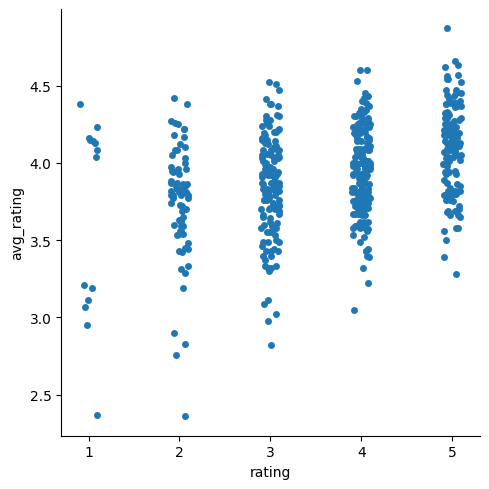

In [69]:
ax = sns.catplot(data=all_books_df, x='rating', y='avg_rating', native_scale=True)

<AxesSubplot: xlabel='rating', ylabel='Count'>

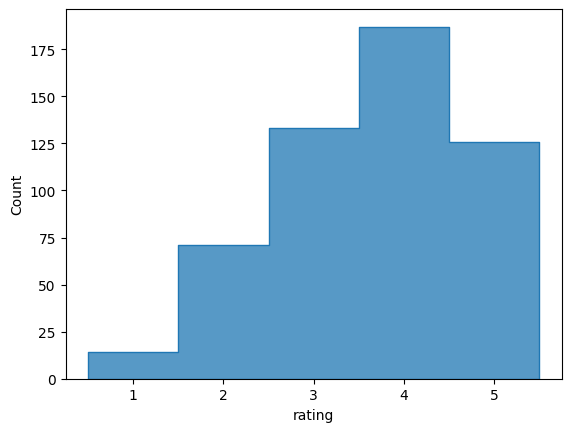

In [85]:
sns.histplot(data=all_books_df, x='rating', discrete=True, element='step')

<AxesSubplot: xlabel='avg_rating', ylabel='Count'>

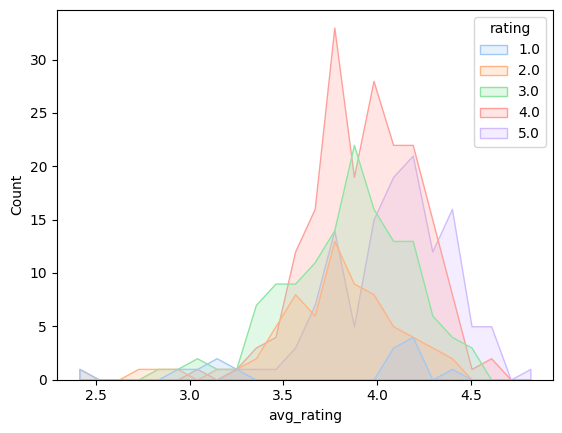

In [83]:
sns.histplot(data=all_books_df, x='avg_rating', element='poly', hue='rating', palette='pastel')

<AxesSubplot: xlabel='avg_rating', ylabel='num_pages'>

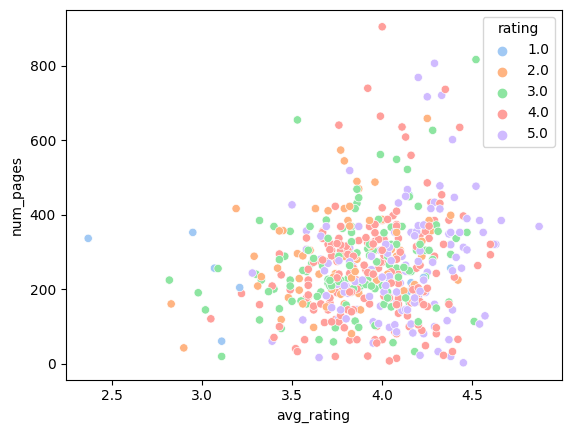

In [86]:
sns.scatterplot(data=all_books_df, x='avg_rating', y='num_pages', hue='rating', palette='pastel')